# Anticipez les besoins en consommation de bâtiments

## Problematique : 
Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle a besoin d'un ingénieur machine learning. la mission ? Prédire la consommation électrique des bâtiments municipaux.

#### Auteur: SACKO Alseny

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as mno
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from category_encoders import TargetEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection  import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#from sklearn.model_selection import learning_curve

# INPORTATION DES DONNEES

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [22]:
data_energy = pd.read_csv(r'C:\Users\pc\Documents\projet.3.O.C.Rnew\Donnees\Building_Energy.csv')

In [23]:
df_energy = data_energy.copy()
df_energy.shape

(3376, 46)

# Analyse exploratoire

## Analyse univariée

### Identification de la variable cible
La variable cible: "TotalGHGEmissions"

### Identification de nombre de lignes et de colonnes dans la base intiale
Le jeu de donnes contient 3376 observation et 46 predicteurs

In [24]:
df_energy.shape

(3376, 46)

### Les differents types de variables dans le jeu de donnees
Le jeu de donnees contient 30 variables qualitatives (22 float et 8 int), 15 variables qualitatives (15 objects) et une variable booleenne (1 bool)

In [25]:
df_energy.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

<AxesSubplot:ylabel='None'>

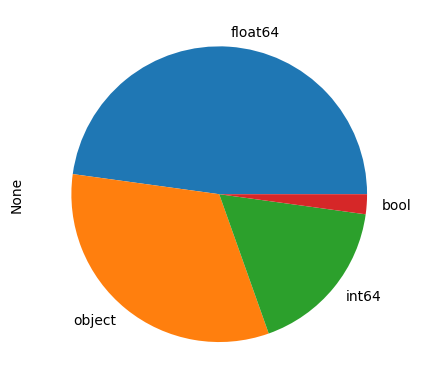

In [26]:
df_energy.dtypes.value_counts().plot.pie()

In [27]:
df_energy.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

### Statistioques descriptives

In [28]:
## Variables quantitatives
##
df_energy.describe(include='all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3367,3356,3.356000e+03,1679,1679.000000,596,596.000000,119,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,NaN,NaN,7.917764e+04,NaN,28444.075817,NaN,11738.675166,NaN,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,NaN,NaN,2.017034e+05,NaN,54392.917928,NaN,29331.199286,NaN,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,NaN,NaN,2.509475e+04,NaN,5000.000000,NaN,2239.000000,NaN,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,NaN,NaN,3.989400e+04,NaN,10664.000000,NaN,5043.000000,NaN,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.657115

### Analyse des valeurs manquantes

#### Remplissage des colonnes

<AxesSubplot:>

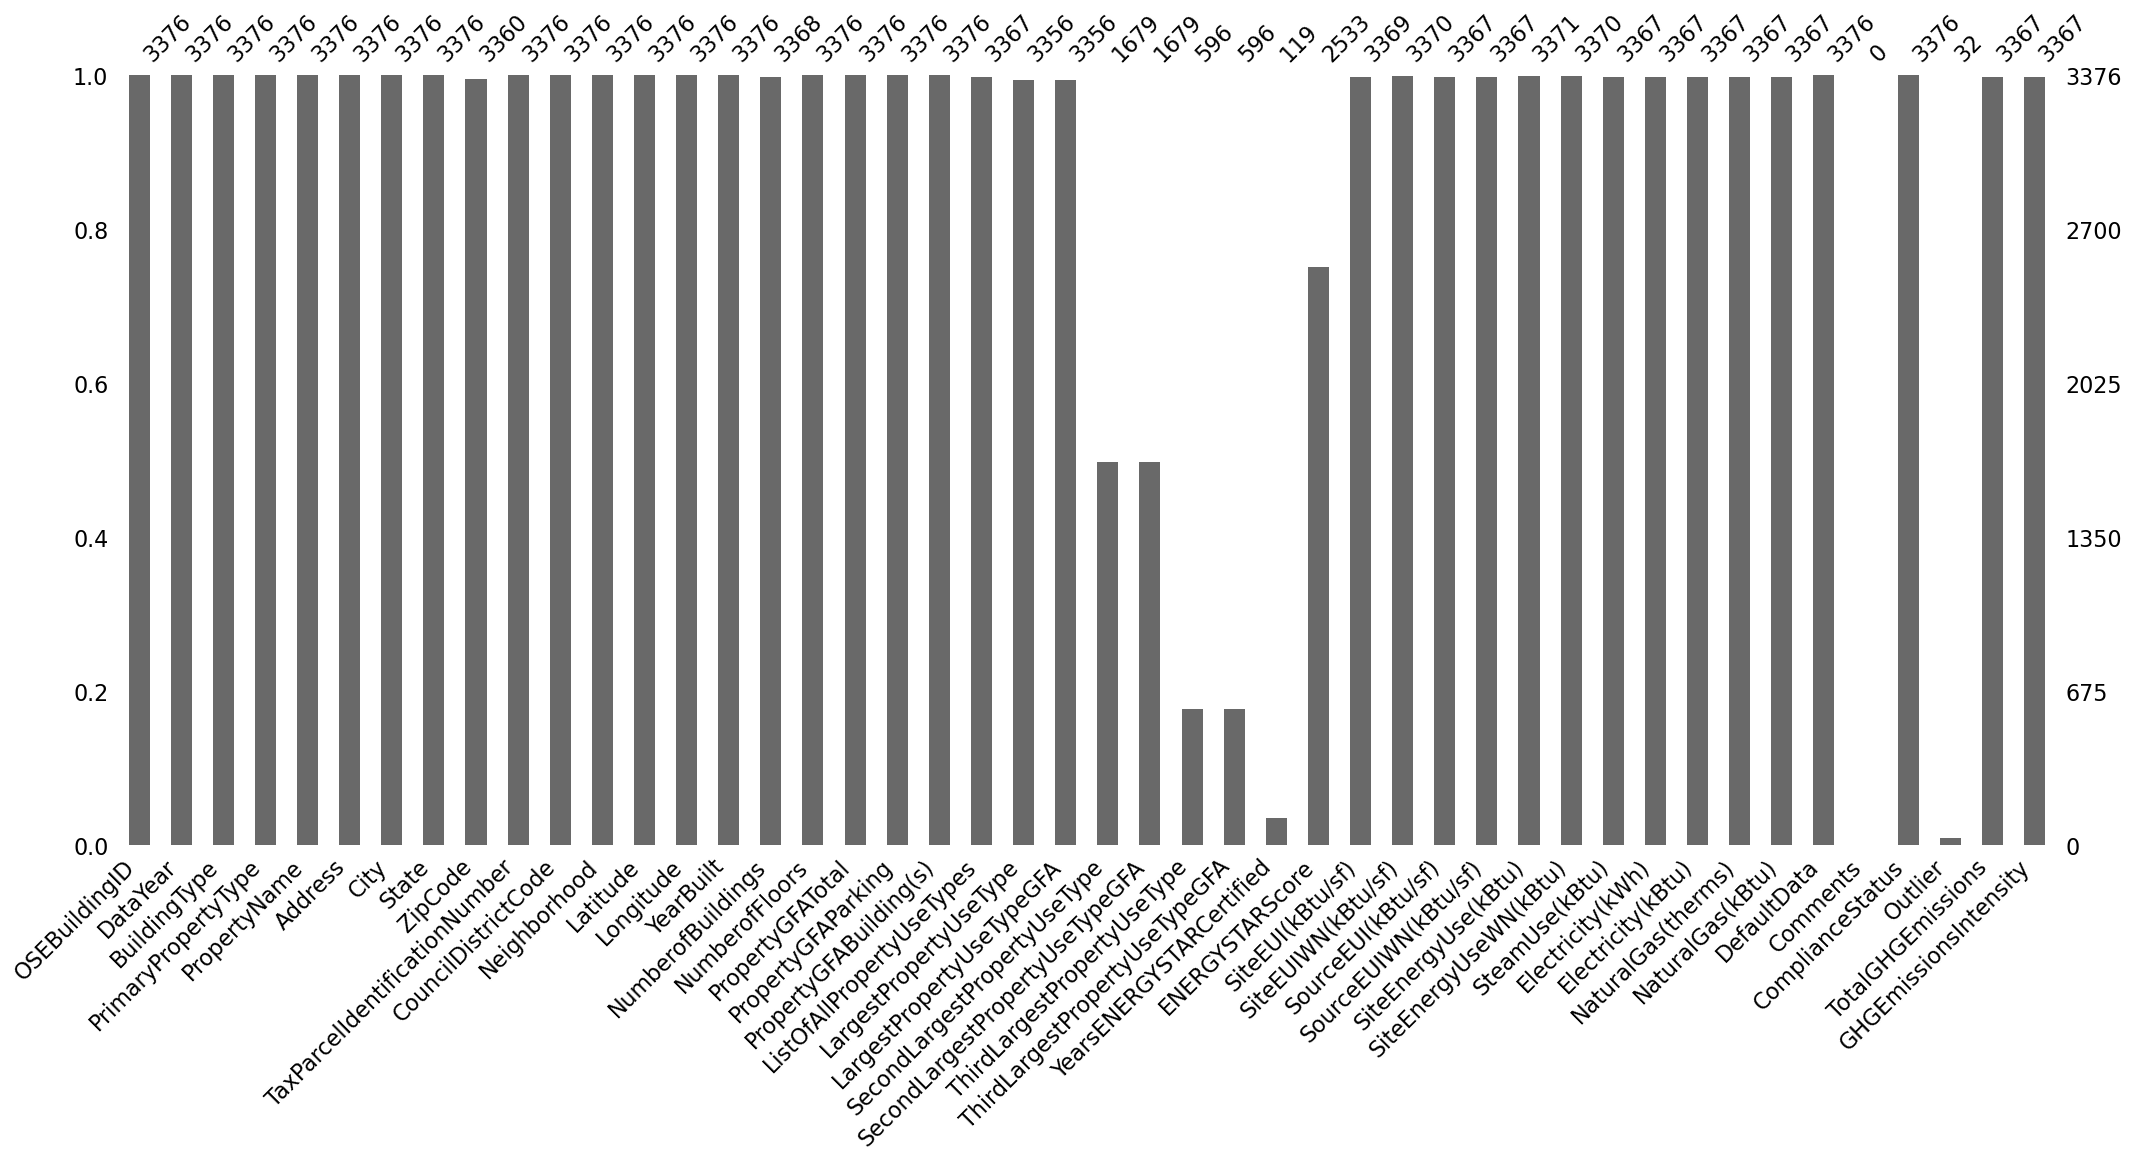

In [29]:
mno.bar(df_energy)

In [30]:
def showall_missing(df):
    return (df_energy.isna().sum()/df_energy.shape[0]).sort_values(ascending=True)*100

In [31]:
showall_missing(df_energy)

OSEBuildingID                        0.000000
PropertyGFABuilding(s)               0.000000
PropertyGFAParking                   0.000000
PropertyGFATotal                     0.000000
NumberofFloors                       0.000000
YearBuilt                            0.000000
Longitude                            0.000000
Latitude                             0.000000
Neighborhood                         0.000000
DefaultData                          0.000000
CouncilDistrictCode                  0.000000
ComplianceStatus                     0.000000
State                                0.000000
City                                 0.000000
Address                              0.000000
PropertyName                         0.000000
PrimaryPropertyType                  0.000000
BuildingType                         0.000000
DataYear                             0.000000
TaxParcelIdentificationNumber        0.000000
SiteEnergyUse(kBtu)                  0.148104
SiteEnergyUseWN(kBtu)             

In [32]:
def pie_NaN(dataframe):

    lignes = dataframe.shape[0] 
    colonnes = dataframe.shape[1]

  # nombre de données non manquante
    nb_data = dataframe.count().sum()

  # nombre de données totale de ce jeu de données (colonnes*lignes)
    nb_totale = (colonnes*lignes)

  #taux remplissage jeu de données
    rate_dataOK = (nb_data/nb_totale)
    print("Le jeux de données est rempli à {:.2%}".format(rate_dataOK))
    print("et il a {:.2%} de données manquantes".format(1-rate_dataOK))
    print(" ")
    print(" ")
    
     # Pie Plot
    rates = [rate_dataOK, 1 - rate_dataOK]
    labels = ["Données", "NAN"]

    explode =(0,0.1) 
    colors = ['gold', 'pink']

  # Plot
    plt.figure(figsize=(12,15))
    plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 26})

    ttl=plt.title("Taux des valeurs manquantes dans le jeu de données", fontsize = 32)
    ttl.set_position([0.5, 0.50])

    plt.axis('equal')
  #ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout() 

    plt.show() 

Le jeux de données est rempli à 87.15%
et il a 12.85% de données manquantes
 
 


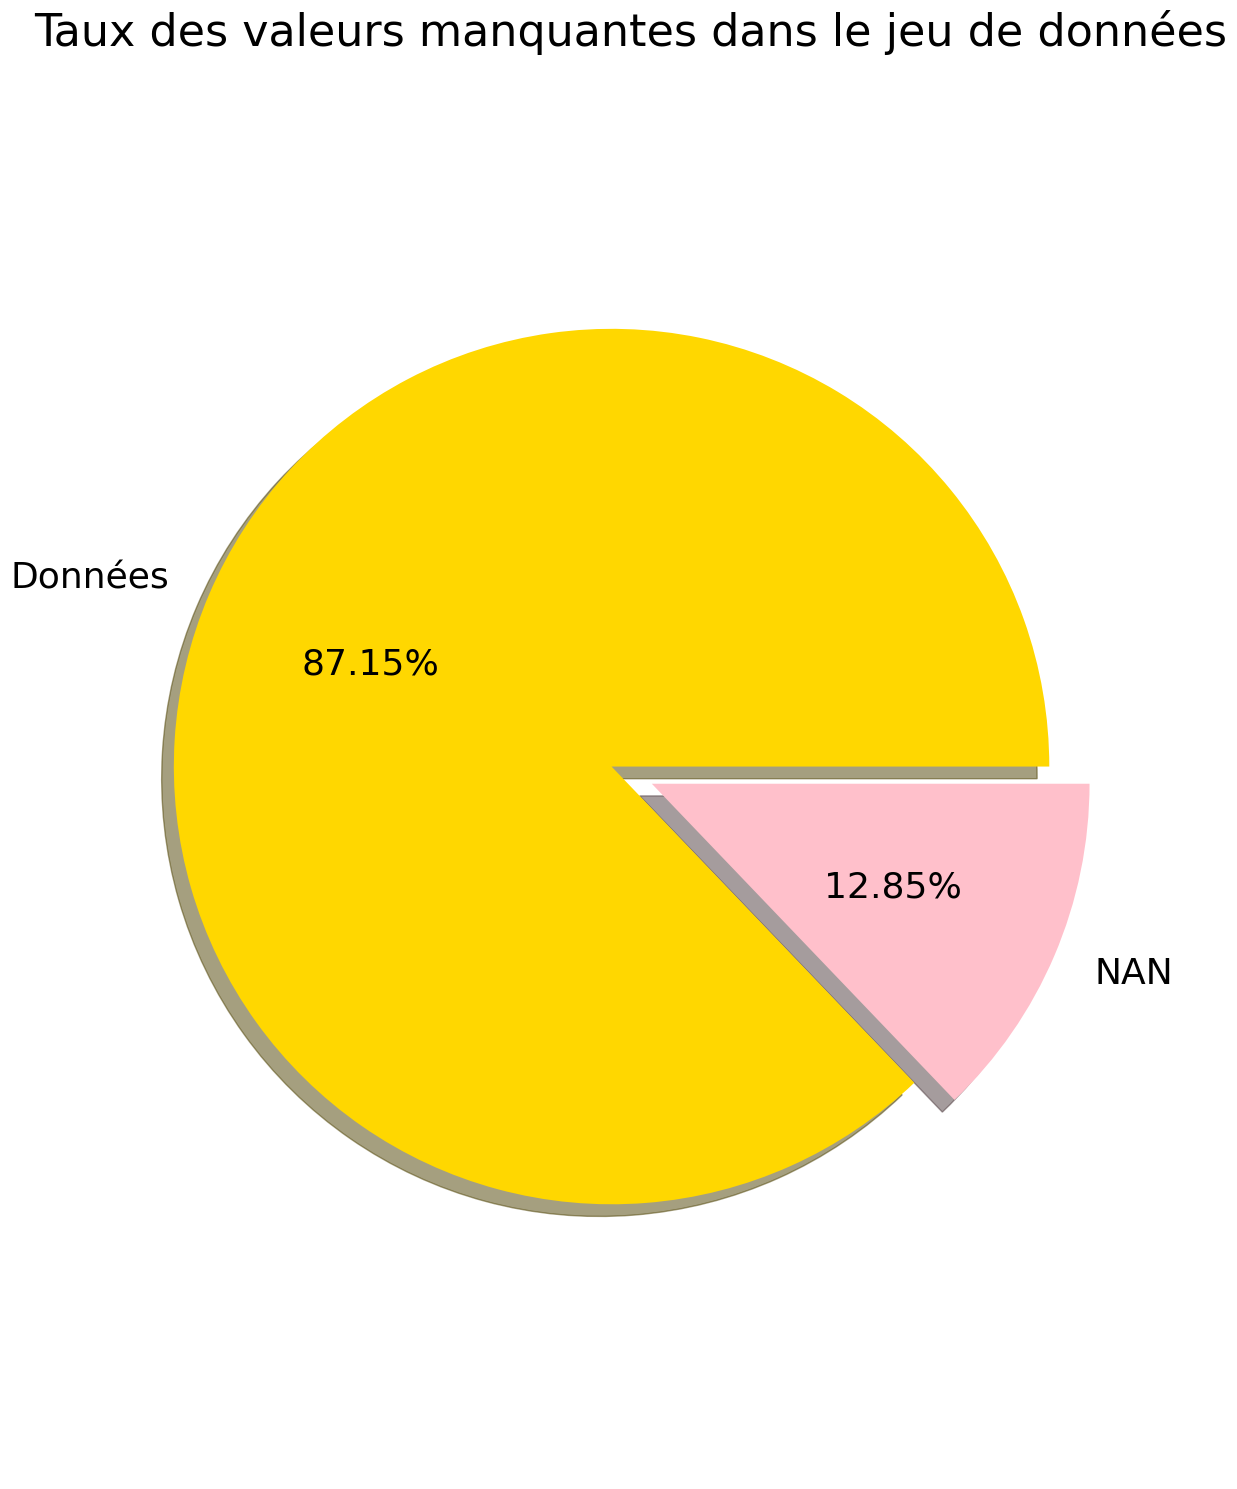

In [33]:
pie_NaN(df_energy)

On peut voir sur notre figure ci-dessus que le jeu de donnees contient 12,85% de valeurs manquantes

## Nous allons par la suite  supprmer  des colonnes dont (NAN >= 50%)  et supprimer aussi les fonctionalités unitiles pour la suite du travail 

In [34]:
df_energy = df_energy[df_energy.columns[df_energy.isna().sum()/df_energy.shape[0] < 0.50]]

## Affichage après la suppression

<AxesSubplot:>

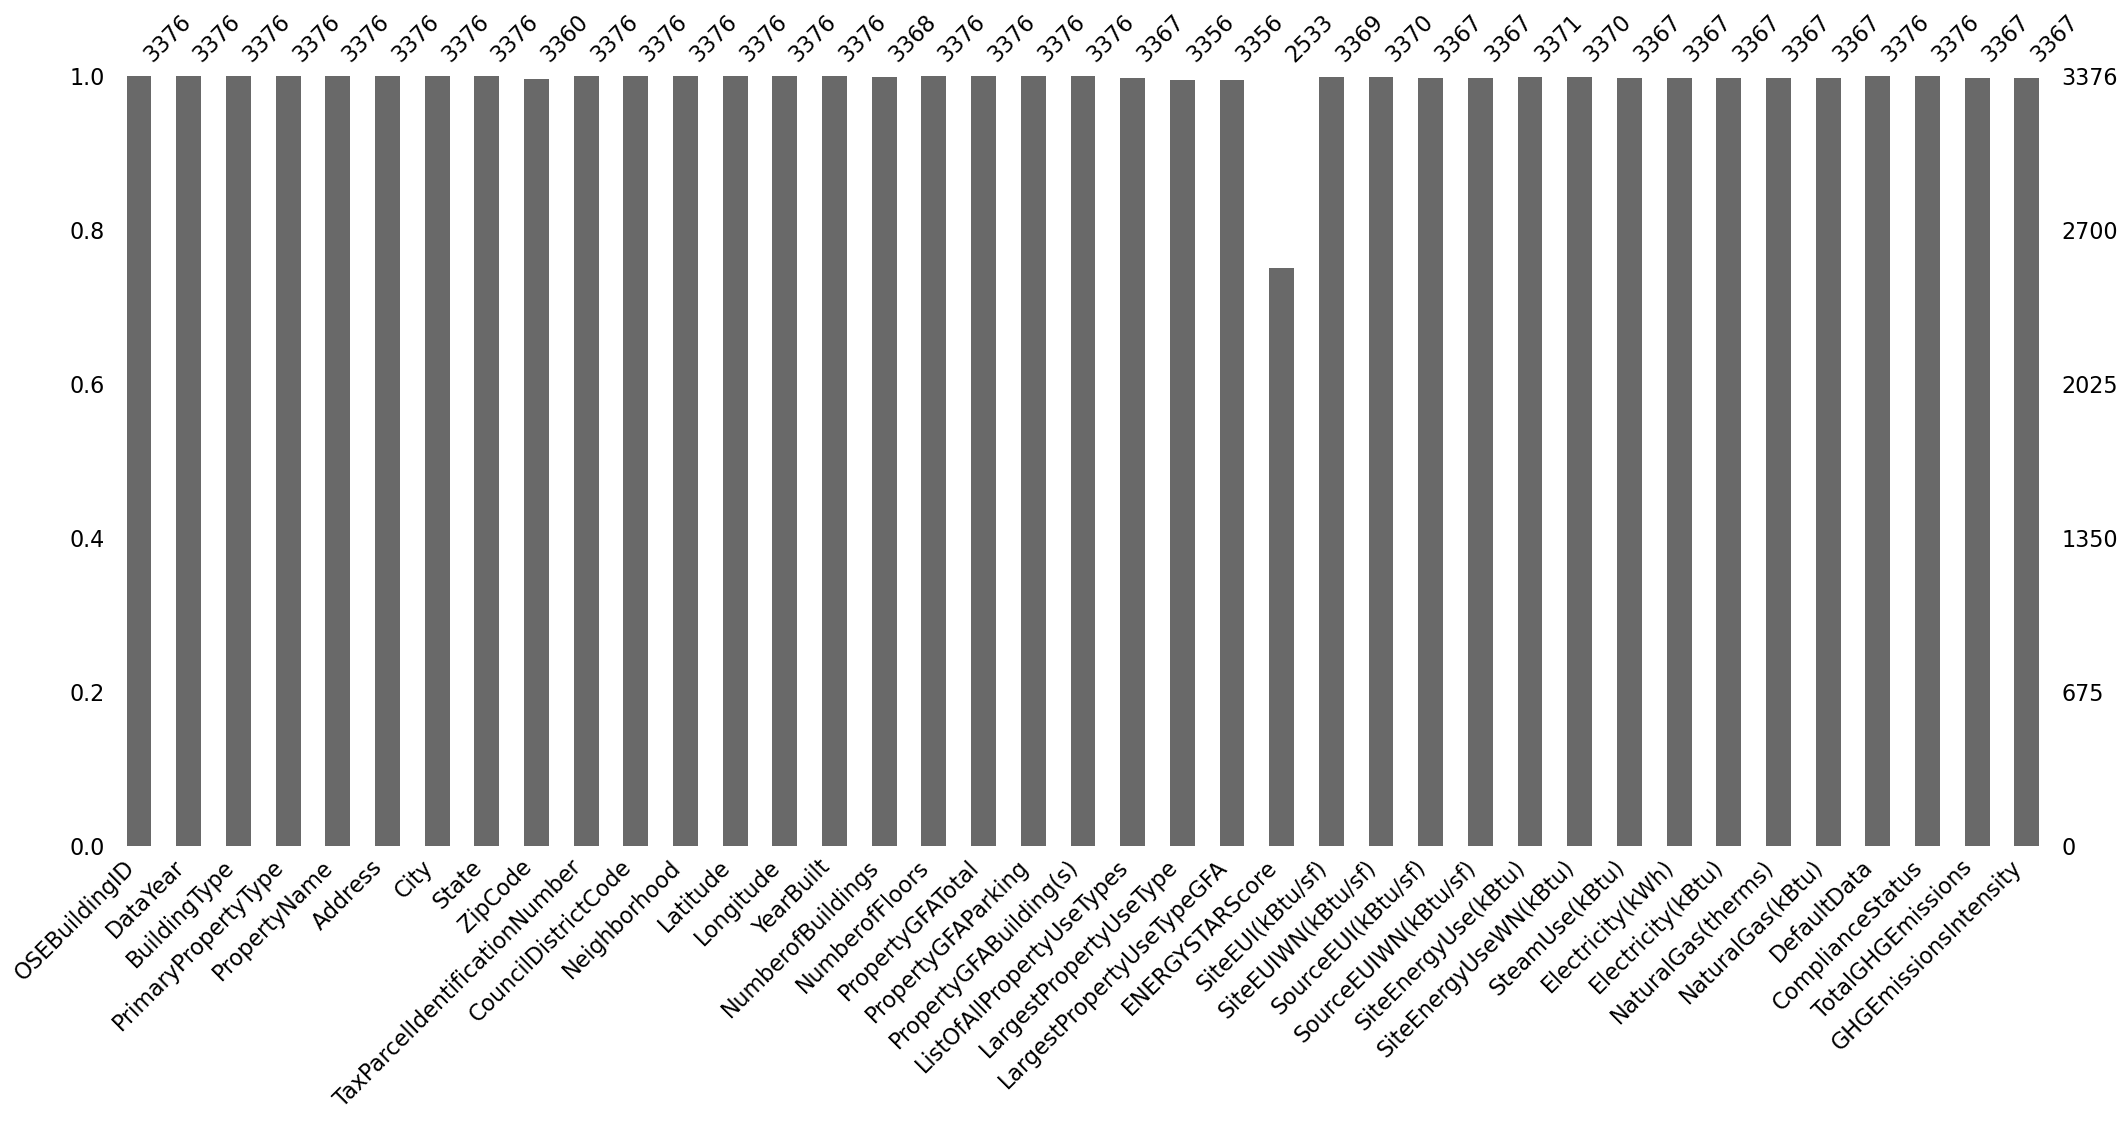

In [35]:
mno.bar(df_energy)

In [36]:
(df_energy.isna().sum()/df_energy.shape[0]).sort_values(ascending=True)*100# pourcentage de nan pour chaque colonne

OSEBuildingID                     0.000000
ComplianceStatus                  0.000000
DefaultData                       0.000000
PropertyGFAParking                0.000000
PropertyGFATotal                  0.000000
NumberofFloors                    0.000000
YearBuilt                         0.000000
Longitude                         0.000000
Latitude                          0.000000
Neighborhood                      0.000000
PropertyGFABuilding(s)            0.000000
TaxParcelIdentificationNumber     0.000000
DataYear                          0.000000
State                             0.000000
City                              0.000000
BuildingType                      0.000000
Address                           0.000000
PropertyName                      0.000000
PrimaryPropertyType               0.000000
CouncilDistrictCode               0.000000
SiteEnergyUse(kBtu)               0.148104
SiteEnergyUseWN(kBtu)             0.177725
SiteEUIWN(kBtu/sf)                0.177725
SiteEUI(kBt

## Suppression des variables unitiles

In [37]:
df_energy=df_energy.drop(["OSEBuildingID", "SiteEnergyUse(kBtu)", "SourceEUIWN(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
 "SiteEUI(kBtu/sf)", "NaturalGas(therms)", "NumberofBuildings", "Electricity(kBtu)", "Electricity(kWh)",
"SourceEUI(kBtu/sf)", "ZipCode", "Longitude", "Latitude", "Address", "DefaultData", "DataYear", "PropertyName", "City", 
"State", "ZipCode", "CouncilDistrictCode", "NumberofBuildings", "PropertyGFABuilding(s)", 
"ListOfAllPropertyUseTypes", "ComplianceStatus", "LargestPropertyUseType", 'TaxParcelIdentificationNumber', 'GHGEmissionsIntensity'], axis=1)   

Le jeux de données est rempli à 97.96%
et il a 2.04% de données manquantes
 
 


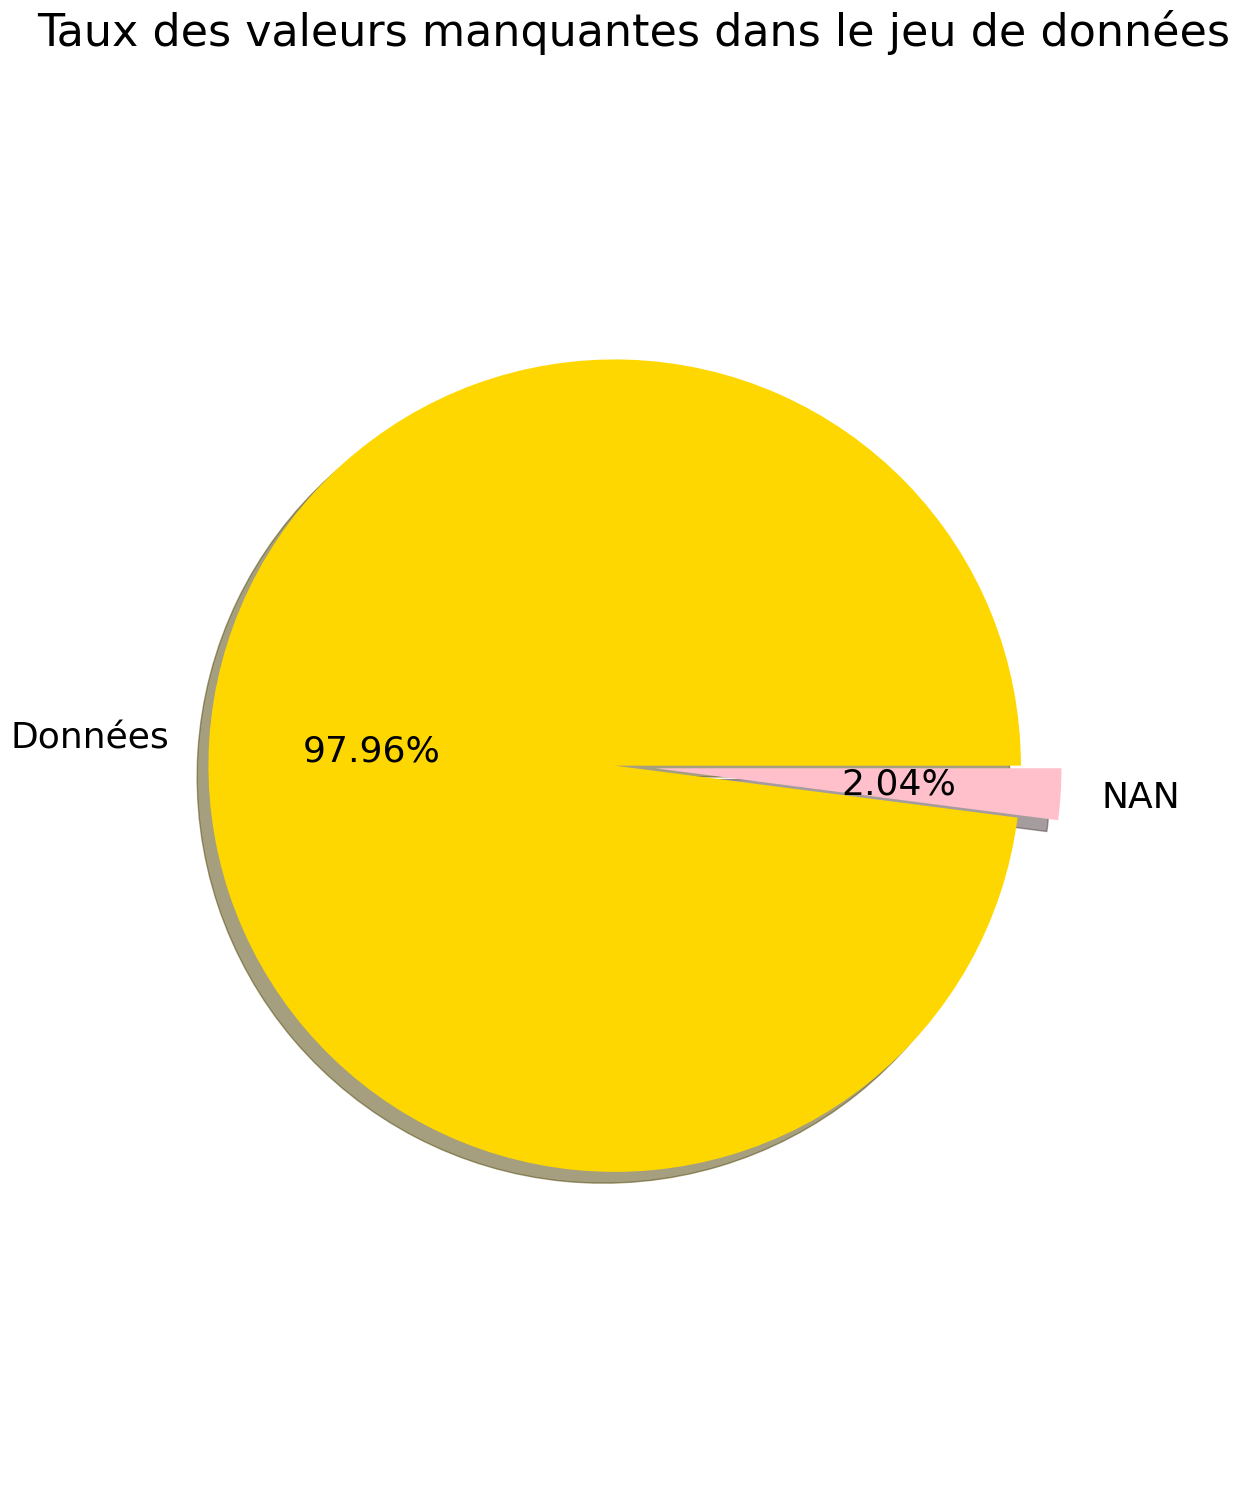

In [38]:
pie_NaN(df_energy)

### Histogrammes et boxplots des variables Continues

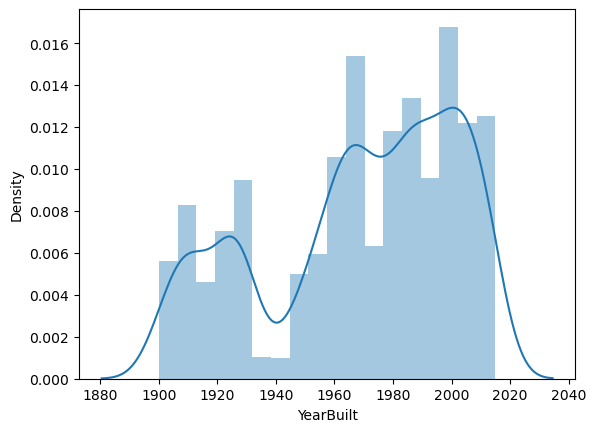

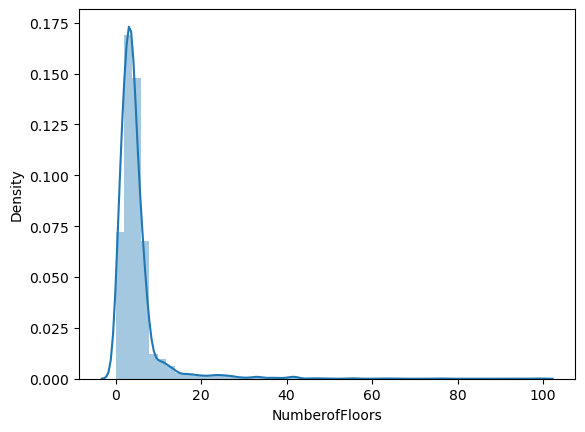

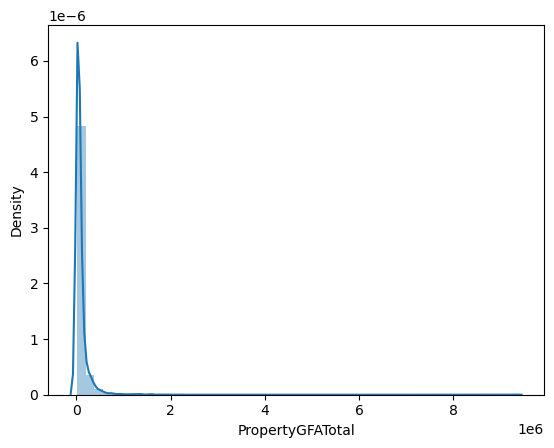

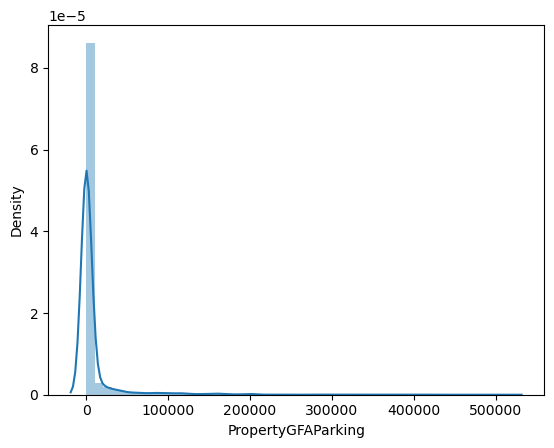

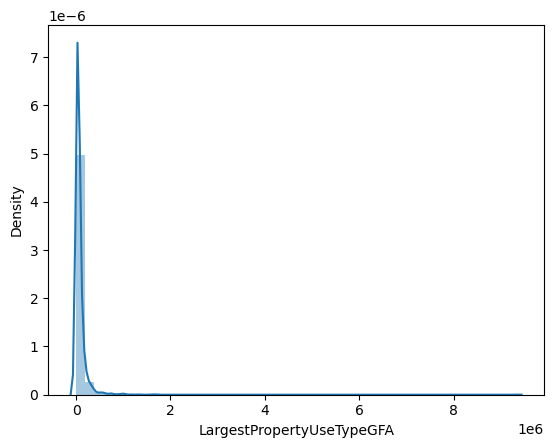

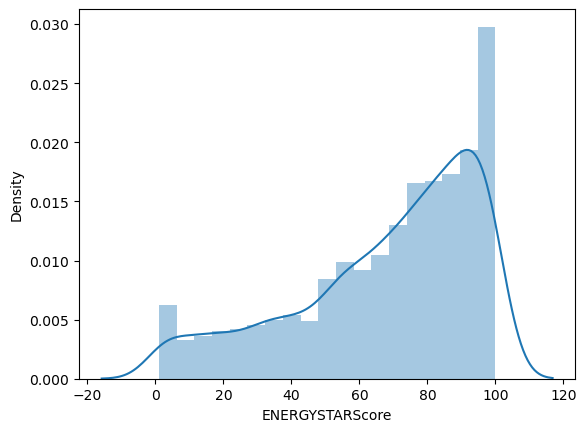

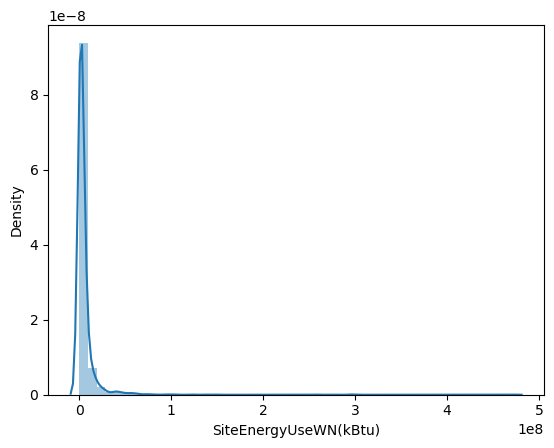

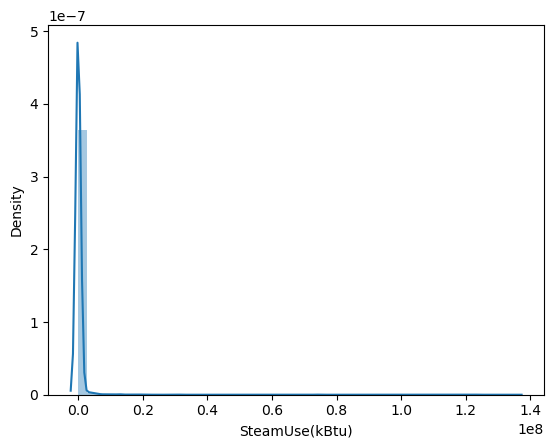

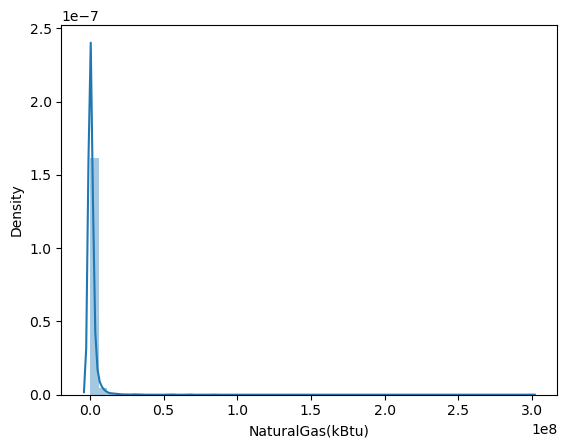

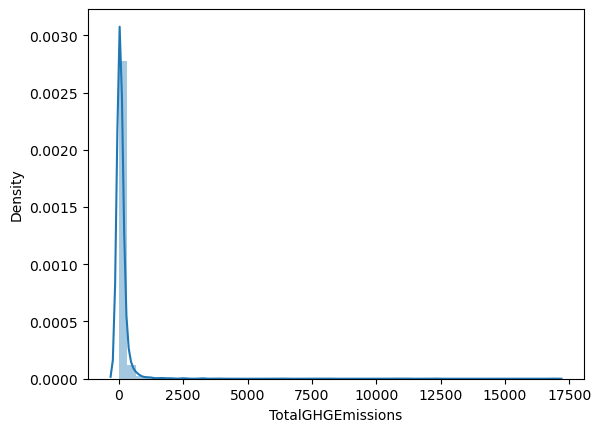

In [39]:
for col in df_energy.select_dtypes(include="number"):
    plt.figure()
    sns.distplot(df_energy[col])

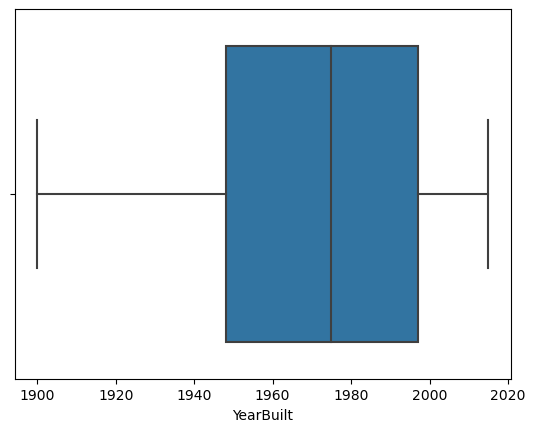

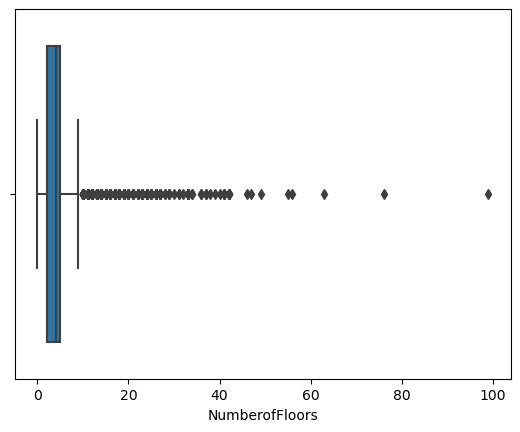

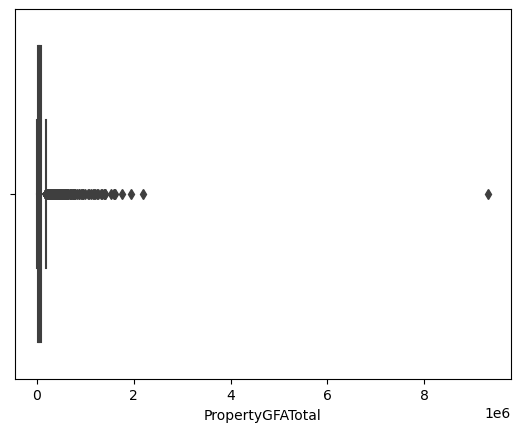

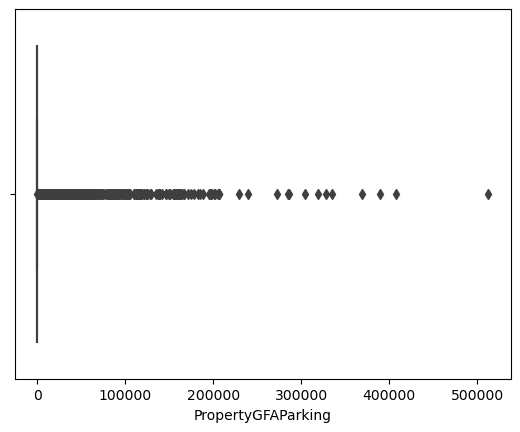

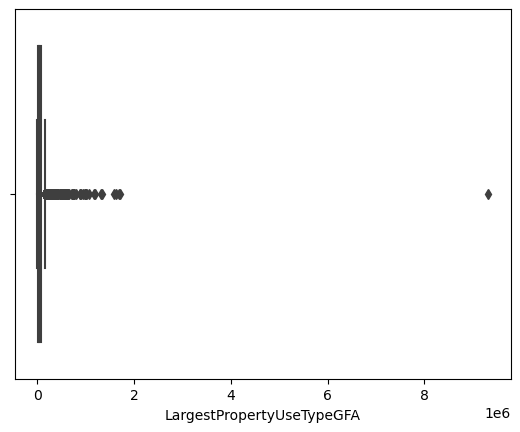

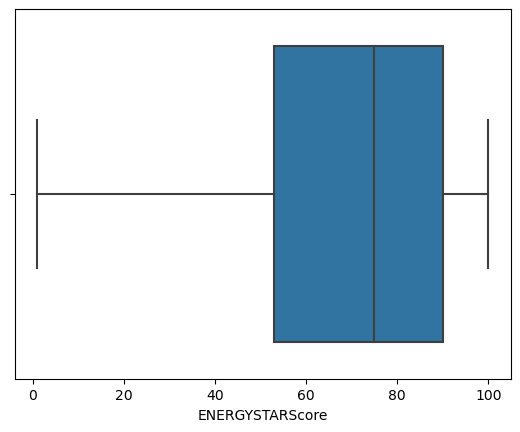

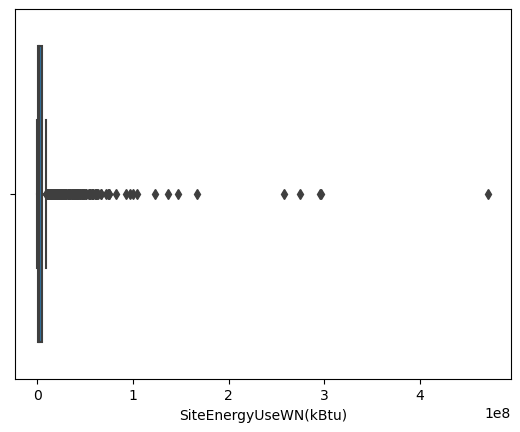

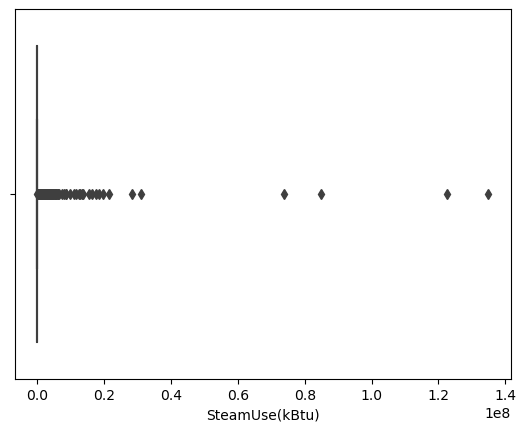

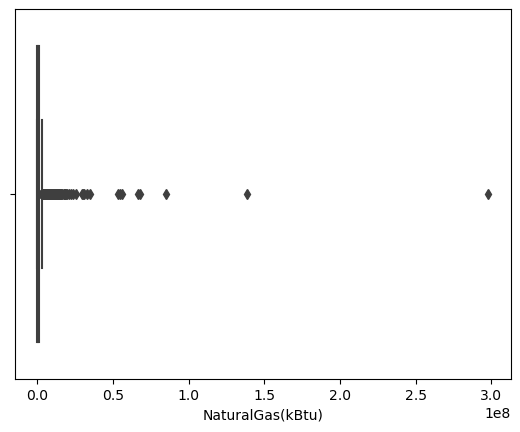

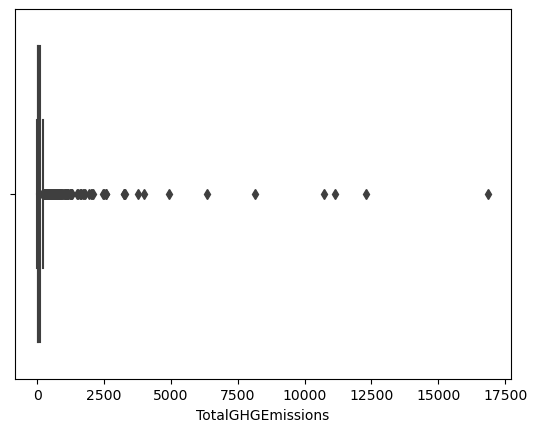

In [40]:
for col in df_energy.select_dtypes(include="number"):
    plt.figure()
    sns.boxplot(df_energy[col])

In [41]:
#df_energy_new=df_energy_new.dropna()
#mno.bar(df_energy) 

## Analyse des variables qualitatives

In [42]:
for col in df_energy.select_dtypes("object"):
    print(f'{col :-<50} {df_energy[col].unique()}')

BuildingType-------------------------------------- ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
PrimaryPropertyType------------------------------- ['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']
Neighborhood-------------------------------------- ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'CENTRAL' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']


## Analyse bivariée

In [43]:
#plt.figure(figsize=(15, 10))
#for col in  df_energy_new.select_dtypes("float"):
   # sns.heatmap(df_energy_new[col])

### Corrélation entre les variables quantitatives

<AxesSubplot:>

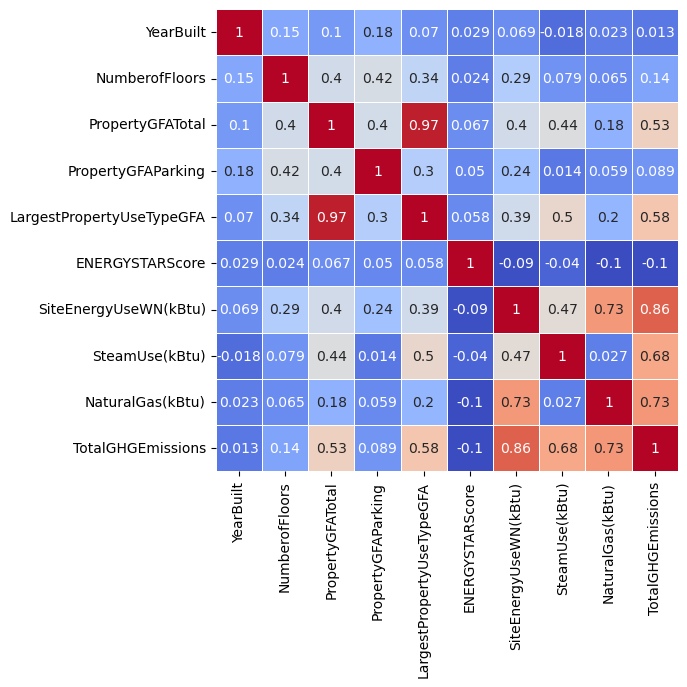

In [44]:
plt.figure(figsize = (12, 6))
cor = df_energy.corr() 
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True,cbar=False)

### Corrélation entre les variables explicatives quantitatives et la variable cible 'TotalGHGEmissions'¶

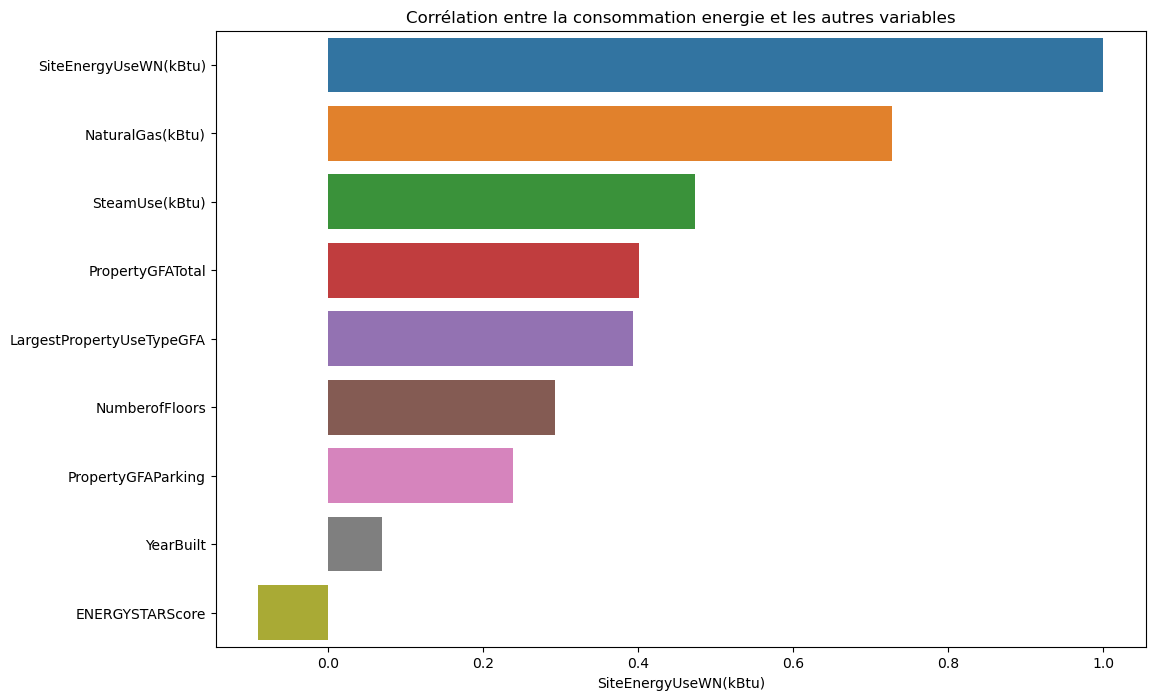

In [52]:
df_energy_cons = df_energy.drop(["TotalGHGEmissions"], axis=1)
df_clean_corr = df_energy_cons.corr()
corr_nutri = df_clean_corr.sort_values('SiteEnergyUseWN(kBtu)',ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_nutri['SiteEnergyUseWN(kBtu)'], y=corr_nutri.index)
plt.title('Corrélation entre la consommation energie et les autres variables')
#plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

### Corrélation entre les variables explicatives quantitatives et la variable cible 'TotalGHGEmissions'

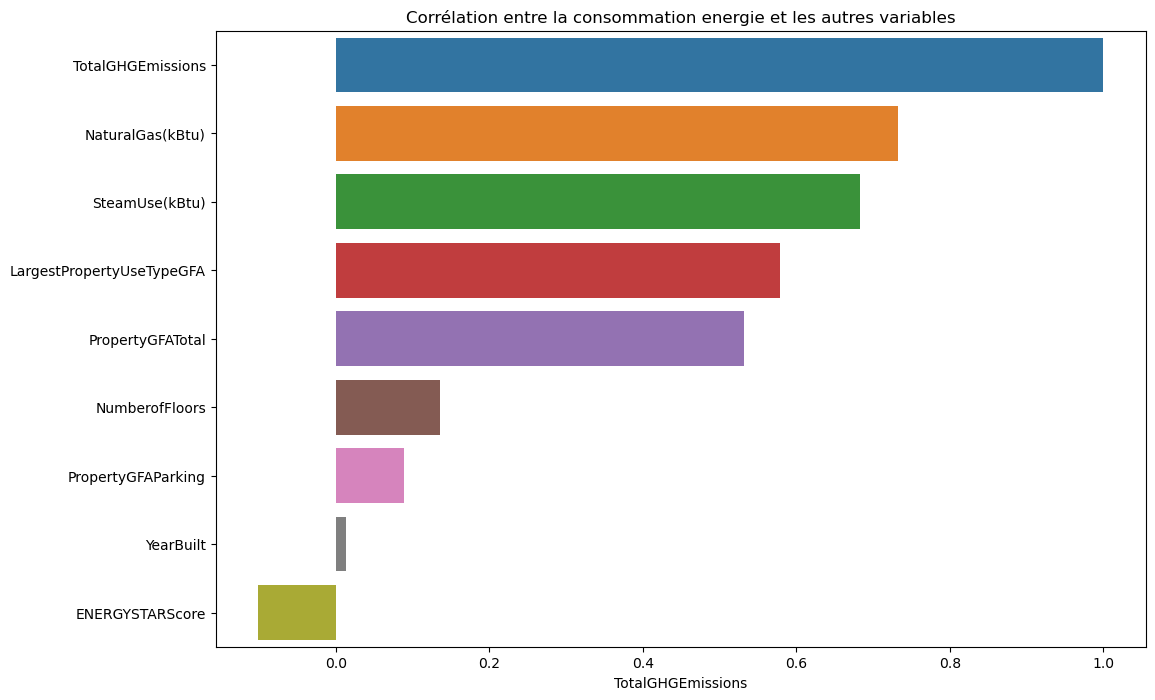

In [56]:
df_energy_emission = df_energy.drop(['SiteEnergyUseWN(kBtu)'], axis=1)
df_clean_corr = df_energy_emission.corr()
corr_nutri = df_clean_corr.sort_values('TotalGHGEmissions',ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_nutri['TotalGHGEmissions'], y=corr_nutri.index)
plt.title('Corrélation entre la consommation energie et les autres variables')
#plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

## Exportation des données nettoyées

In [59]:
df_energy.to_csv(r'C:\Users\pc\Documents\projet.3.O.C.Rnew\Donnees\dataSetEnergy.csv', index=False)